# AUTOMATED STOCK OPEN PRICE PREDICTION
### AUTHOR : Aravind Ravikumar
### DATE WRITTEN: 7-June-2020
### Goal: To predict Open price of ICICI Bank 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../Data/STOCKS.CSV')
dfg = pd.read_csv('../Data/HangSeng.CSV')
dfy = pd.read_csv('../Data/NYSE.CSV')
dfz = pd.read_csv('../Data/Shenzhen.CSV')
dfk = pd.read_csv('../Data/KOSPI.CSV')
dfe = pd.read_csv('../Data/Euronext100.CSV')
dfx = pd.read_csv('../Data/SGXNifty.CSV')
dfn = pd.read_csv('../Data/NASDAQ.CSV')
dfi = pd.read_csv('../Data/Nikkei.CSV')

In [3]:
dfi.head()

,Date,Nikkei Open
0,07-01-2015,16808.25977
1,08-01-2015,17067.40039
2,09-01-2015,17318.74023
3,13-01-2015,16970.88086
4,14-01-2015,16961.82031


In [4]:
dfx.head()

,Date,SGXNifty Open
0,"Jan 07, 2015","8,149.50"
1,"Jan 08, 2015","8,151.50"
2,"Jan 09, 2015","8,256.50"
3,"Jan 12, 2015","8,314.50"
4,"Jan 13, 2015","8,357.50"


## Converting to common date format

In [5]:
train['Date'] =  pd.to_datetime(train['Date'], format='%d-%m-%Y')
dfg['Date'] =  pd.to_datetime(dfg['Date'], format='%d-%m-%Y')
dfy['Date'] =  pd.to_datetime(dfy['Date'], format='%d-%m-%Y')
dfz['Date'] =  pd.to_datetime(dfz['Date'], format='%d-%m-%Y')
dfk['Date'] =  pd.to_datetime(dfk['Date'], format='%d-%m-%Y')
dfe['Date'] =  pd.to_datetime(dfe['Date'], format='%d-%m-%Y')
dfx['Date'] =  pd.to_datetime(dfx['Date'], format='%b %d, %Y')
dfn['Date'] =  pd.to_datetime(dfn['Date'], format='%d-%m-%Y')
dfi['Date'] =  pd.to_datetime(dfi['Date'], format='%d-%m-%Y')

## Merging Dataframes on the basis of date

In [6]:
train = pd.merge(train,dfg,how='inner',on='Date')
train = pd.merge(train,dfz,how='inner',on='Date')
train = pd.merge(train,dfy,how='inner',on='Date')
train = pd.merge(train,dfk,how='inner',on='Date')
train = pd.merge(train,dfe,how='inner',on='Date')
train = pd.merge(train,dfx,how='inner',on='Date')
train = pd.merge(train,dfn,how='inner',on='Date')
train = pd.merge(train,dfi,how='inner',on='Date')

In [7]:
train['SGXNifty Open'] = train['SGXNifty Open'].str.replace(",","").astype(float) # string to float conversion

In [8]:
train.head()

,Date,NIFTY_India Adj Close,Escorts Adj Close,Muthoot Adj Close,SBI Adj Close,HCL Adj Close,ICICI Adj Close,Escorts Open,Muthoot Open,SBI Open,HCL Open,ICICI Open,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open
0,2015-01-07,8127.350098,119.312721,172.062637,289.701782,322.932098,292.334198,120.250000,195.899994,300.000000,384.875000,314.182007,23396.69922,11612.73047,10514.87012,1878.900024,805.469971,8149.5,4592.740234,16808.25977
1,2015-01-08,8102.100098,118.381363,171.755310,289.943268,315.258636,284.430267,122.099998,197.000000,305.000000,379.250000,313.635986,23920.34961,11624.58984,10627.12988,1895.849976,810.940002,8151.5,4650.470215,17067.40039
2,2015-01-09,8234.599609,123.626411,172.589493,294.483459,322.553589,292.166840,127.400002,201.050003,306.700012,384.162994,318.135986,24049.69922,11424.53027,10800.54004,1919.800049,837.729980,8256.5,4736.189941,17318.74023
3,2015-01-13,8323.000000,122.891121,172.238251,296.656952,331.226013,291.409241,125.250000,195.350006,308.149994,393.888000,317.273010,23908.23047,11250.87988,10640.74023,1915.030029,832.760010,8357.5,4664.709961,16970.88086
4,2015-01-14,8299.400391,124.067589,172.150452,294.724976,332.917969,286.658508,126.099998,196.199997,304.000000,398.975006,308.408997,24276.33008,11366.95020,10622.95996,1919.310059,845.299988,8343.5,4661.500000,16961.82031


In [9]:
train.shape

(1081, 20)

In [10]:
train.columns

Index(['Date', 'NIFTY_India Adj Close', 'Escorts Adj Close',
       'Muthoot Adj Close', 'SBI Adj Close', 'HCL Adj Close',
       'ICICI Adj Close', 'Escorts Open', 'Muthoot Open', 'SBI Open',
       'HCL Open', 'ICICI Open', 'HangSeng Open', 'Shenzhen Open',
       'NYSE Adj Close', 'KOSPI Open', 'Euronext Adj Close', 'SGXNifty Open',
       'NASDAQ Adj Close', 'Nikkei Open'],
      dtype='object')

In [11]:
# Rearrange columns

train = train[['Date', 'NIFTY_India Adj Close', 'ICICI Adj Close',
       'HangSeng Open', 'Shenzhen Open',
       'NYSE Adj Close', 'KOSPI Open', 'Euronext Adj Close', 'SGXNifty Open',
       'NASDAQ Adj Close', 'Nikkei Open', 'ICICI Open']]

In [12]:
train.head(2)

,Date,NIFTY_India Adj Close,ICICI Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open,ICICI Open
0,2015-01-07,8127.350098,292.334198,23396.69922,11612.73047,10514.87012,1878.900024,805.469971,8149.5,4592.740234,16808.25977,314.182007
1,2015-01-08,8102.100098,284.430267,23920.34961,11624.58984,10627.12988,1895.849976,810.940002,8151.5,4650.470215,17067.40039,313.635986


In [13]:
train.isnull().sum()

Date                      0
NIFTY_India Adj Close     6
ICICI Adj Close           2
HangSeng Open             3
Shenzhen Open             1
NYSE Adj Close            0
KOSPI Open                5
Euronext Adj Close        1
SGXNifty Open             0
NASDAQ Adj Close          0
Nikkei Open              13
ICICI Open                0
dtype: int64

In [14]:
#Displaying rows having Null values

train[train['ICICI Adj Close'].isnull()]

,Date,NIFTY_India Adj Close,ICICI Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open,ICICI Open
27,2015-03-02,NaN,NaN,24996.75977,11869.959960,11062.79004,1996.719971,973.010010,8895.5,4963.529785,18869.40039,318.954987
990,2019-10-29,NaN,NaN,27027.56055,9812.480469,13186.42969,2103.919922,1099.329956,11668.0,8325.990234,22950.78906,470.200012


In [15]:
# strategies to fill null values
#train['Escorts Open'][train['Date'] == '10/25/2019'] = train['Escorts Open'][train['Date'] == '10/27/2019']
train['NIFTY_India Adj Close'].fillna(train['NIFTY_India Adj Close'].mean(),inplace=True)
train['Nikkei Open'].fillna(train['Nikkei Open'].mean(),inplace=True)
train.dropna(axis=0,inplace=True)

In [16]:
train.shape

(1069, 12)

In [17]:
train.isnull().sum()

Date                     0
NIFTY_India Adj Close    0
ICICI Adj Close          0
HangSeng Open            0
Shenzhen Open            0
NYSE Adj Close           0
KOSPI Open               0
Euronext Adj Close       0
SGXNifty Open            0
NASDAQ Adj Close         0
Nikkei Open              0
ICICI Open               0
dtype: int64

# Feature Selection Methods 
## Filter Method: Correlation Coefficient

In [18]:
train.head()

,Date,NIFTY_India Adj Close,ICICI Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open,ICICI Open
0,2015-01-07,8127.350098,292.334198,23396.69922,11612.73047,10514.87012,1878.900024,805.469971,8149.5,4592.740234,16808.25977,314.182007
1,2015-01-08,8102.100098,284.430267,23920.34961,11624.58984,10627.12988,1895.849976,810.940002,8151.5,4650.470215,17067.40039,313.635986
2,2015-01-09,8234.599609,292.166840,24049.69922,11424.53027,10800.54004,1919.800049,837.729980,8256.5,4736.189941,17318.74023,318.135986
3,2015-01-13,8323.000000,291.409241,23908.23047,11250.87988,10640.74023,1915.030029,832.760010,8357.5,4664.709961,16970.88086,317.273010
4,2015-01-14,8299.400391,286.658508,24276.33008,11366.95020,10622.95996,1919.310059,845.299988,8343.5,4661.500000,16961.82031,308.408997


In [19]:
cor = train.corr()
cor

,NIFTY_India Adj Close,ICICI Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open,ICICI Open
NIFTY_India Adj Close,1.000000,0.854235,0.766893,-0.450094,0.945338,0.495026,0.842400,0.998477,0.947671,0.824164,0.836378
ICICI Adj Close,0.854235,1.000000,0.534369,-0.279371,0.785571,0.134117,0.722396,0.854194,0.860755,0.692058,0.997080
HangSeng Open,0.766893,0.534369,1.000000,-0.005471,0.833537,0.777748,0.806060,0.767356,0.703703,0.832053,0.531358
Shenzhen Open,-0.450094,-0.279371,-0.005471,1.000000,-0.303254,-0.018939,-0.083794,-0.452783,-0.446607,-0.141168,-0.242147
NYSE Adj Close,0.945338,0.785571,0.833537,-0.303254,1.000000,0.624710,0.919124,0.947106,0.920579,0.889342,0.773173
KOSPI Open,0.495026,0.134117,0.777748,-0.018939,0.624710,1.000000,0.624734,0.497214,0.417057,0.618370,0.122364
Euronext Adj Close,0.842400,0.722396,0.806060,-0.083794,0.919124,0.624734,1.000000,0.843630,0.810895,0.904074,0.722945
SGXNifty Open,0.998477,0.854194,0.767356,-0.452783,0.947106,0.497214,0.843630,1.000000,0.947391,0.825160,0.836809
NASDAQ Adj Close,0.947671,0.860755,0.703703,-0.446607,0.920579,0.417057,0.810895,0.947391,1.000000,0.821314,0.837221
Nikkei Open,0.824164,0.692058,0.832053,-0.141168,0.889342,0.618370,0.904074,0.825160,0.821314,1.000000,0.686080


In [20]:
cor.index[abs(cor['ICICI Open']) > .7]

Index(['NIFTY_India Adj Close', 'ICICI Adj Close', 'NYSE Adj Close',
       'Euronext Adj Close', 'SGXNifty Open', 'NASDAQ Adj Close',
       'ICICI Open'],
      dtype='object')

## Wrapper Method: Step forward feature selection

In [41]:
X = train[train.columns[1:-1]]
Y = train[train.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(LinearRegression(), 
           k_features=5, 
           forward=True, 
           floating=False,
           scoring='neg_mean_squared_error',
           cv=5)

# fit the object to the training data.
sfs = sfs.fit(X_train, y_train)

# print the selected features.
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

Index(['ICICI Adj Close', 'HangSeng Open', 'KOSPI Open', 'Euronext Adj Close',
       'NASDAQ Adj Close'],
      dtype='object')


## Finding Independent Features

In [312]:
train2 = train[['NIFTY_India Adj Close', 'ICICI Adj Close', 'NYSE Adj Close',
       'Euronext Adj Close', 'SGXNifty Open', 'NASDAQ Adj Close']]

In [313]:
train2.head(2)

,NIFTY_India Adj Close,ICICI Adj Close,NYSE Adj Close,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close
0,8127.350098,292.334198,10514.87012,805.469971,8149.5,4592.740234
1,8102.100098,284.430267,10627.12988,810.940002,8151.5,4650.470215


In [314]:
cor2 = train2.corr()
cor2

,NIFTY_India Adj Close,ICICI Adj Close,NYSE Adj Close,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close
NIFTY_India Adj Close,1.000000,0.854235,0.945338,0.842400,0.998477,0.947671
ICICI Adj Close,0.854235,1.000000,0.785571,0.722396,0.854194,0.860755
NYSE Adj Close,0.945338,0.785571,1.000000,0.919124,0.947106,0.920579
Euronext Adj Close,0.842400,0.722396,0.919124,1.000000,0.843630,0.810895
SGXNifty Open,0.998477,0.854194,0.947106,0.843630,1.000000,0.947391
NASDAQ Adj Close,0.947671,0.860755,0.920579,0.810895,0.947391,1.000000


## It shows that Singapore Nifty Open and Indian Nifty Close are highly correlated. Similarly, NYSE Close and Euronext Close are correlated with each other and also to Indian Nifty Close.

## Normalization

In [29]:
#X = train[train.columns[0:-1]]
# Y = train[train.columns[-1]]


In [30]:
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_tr = scaler.transform(X_train)
# X_te = scaler.transform(X_test)    
# #Converting n-d array to dataframe
# X_train = pd.DataFrame(X_tr, columns=['Escorts Adj Close', 'NIFTY_India Adj Close', 'HangSeng Open',
#        'Nikkei Open'])
# X_test = pd.DataFrame(X_te, columns=['Escorts Adj Close', 'NIFTY_India Adj Close', 'HangSeng Open',
#        'Nikkei Open'])

## Feature Selection using Ensemble Random Forest

In [46]:
X = train[train.columns[1:-1]]
Y = train[train.columns[-1]]

In [47]:
model = RandomForestRegressor(max_depth=4, n_estimators=160)

In [48]:
model.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
labels = list(X.columns)[0:-1]

In [50]:
for feature in zip(labels, model.feature_importances_):
    print(feature)

('NIFTY_India Adj Close', 1.705137930969614e-06)
('ICICI Adj Close', 0.995973008652092)
('HangSeng Open', 5.485013827710014e-06)
('Shenzhen Open', 0.0)
('NYSE Adj Close', 3.4856924508483914e-05)
('KOSPI Open', 4.548947243174075e-06)
('Euronext Adj Close', 3.5555645175620854e-06)
('SGXNifty Open', 1.0741570969381773e-05)
('NASDAQ Adj Close', 0.003966098188910778)


In [51]:
# sfm = SelectFromModel(model, threshold=0.001)
# sfm.fit(X,Y)

In [49]:
# for index in sfm.get_support(indices=True):
#     print(labels[index])

In [ ]:
# X_train_imp = sfm.transform(X)
# X_test_imp = sfm.transform(X_test)

## Since all features are numerical, we give importance to correlation feature selection.
## Link: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

## Selecting Features

In [21]:
#Dont forget to add target column
train_final = train[['NIFTY_India Adj Close', 
                     'ICICI Adj Close',
                    #'HangSeng Open', 
                    # 'Shenzhen Open',
                    #'NYSE Adj Close', 
                     #'KOSPI Open', 
                     'Euronext Adj Close',
                     #'NASDAQ Adj Close',
                     'Nikkei Open',
                     'ICICI Open']]
train_final.head(2)

,NIFTY_India Adj Close,ICICI Adj Close,Euronext Adj Close,Nikkei Open,ICICI Open
0,8127.350098,292.334198,805.469971,16808.25977,314.182007
1,8102.100098,284.430267,810.940002,17067.40039,313.635986


# Handle outliers using IQR

In [22]:
Q1 = train_final.quantile(0.25)
Q3 = train_final.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

NIFTY_India Adj Close    2438.500000
ICICI Adj Close           104.288543
Euronext Adj Close        134.730041
Nikkei Open              3053.009760
ICICI Open                 96.817993
dtype: float64


In [23]:
train_final = train_final[~((train_final < (Q1 - 1.5 * IQR)) |(train_final > (Q3 + 1.5 * IQR))).any(axis=1)]
train_final.shape

(1008, 5)

In [24]:
train_final.head(2)

,NIFTY_India Adj Close,ICICI Adj Close,Euronext Adj Close,Nikkei Open,ICICI Open
0,8127.350098,292.334198,805.469971,16808.25977,314.182007
1,8102.100098,284.430267,810.940002,17067.40039,313.635986


## Test Data

In [25]:
test = pd.read_csv('../Data/STOCKS_test.CSV')
dfgt = pd.read_csv('../Data/HangSeng_test.CSV')
dfyt = pd.read_csv('../Data/NYSE_test.CSV')
dfzt = pd.read_csv('../Data/Shenzhen_test.CSV')
dfkt = pd.read_csv('../Data/KOSPI_test.CSV')
dfet = pd.read_csv('../Data/Euronext100_test.CSV')
dfit = pd.read_csv('../Data/Nikkei_test.CSV')
dfnt = pd.read_csv('../Data/NASDAQ_test.CSV')

In [26]:
#Converting to common date format

test['Date'] =  pd.to_datetime(test['Date'], format='%d-%m-%Y')
dfgt['Date'] =  pd.to_datetime(dfgt['Date'], format='%d-%m-%Y')
dfyt['Date'] =  pd.to_datetime(dfyt['Date'], format='%d-%m-%Y')
dfzt['Date'] =  pd.to_datetime(dfzt['Date'], format='%d-%m-%Y')
dfkt['Date'] =  pd.to_datetime(dfkt['Date'], format='%d-%m-%Y')
dfet['Date'] =  pd.to_datetime(dfet['Date'], format='%d-%m-%Y')
dfit['Date'] =  pd.to_datetime(dfit['Date'], format='%d-%m-%Y')
dfnt['Date'] =  pd.to_datetime(dfnt['Date'], format='%d-%m-%Y')

In [27]:
#Merging Dataframes based on date

test = pd.merge(test,dfgt,how='inner',on='Date')
test = pd.merge(test,dfzt,how='inner',on='Date')
test = pd.merge(test,dfyt,how='inner',on='Date')
test = pd.merge(test,dfkt,how='inner',on='Date')
test = pd.merge(test,dfet,how='inner',on='Date')
test = pd.merge(test,dfit,how='inner',on='Date')
test = pd.merge(test,dfnt,how='inner',on='Date')

In [28]:
test.head()

,Date,NIFTY_India Adj Close,Escorts Adj Close,Muthoot Adj Close,SBI Adj Close,HCL Adj Close,ICICI Adj Close,Escorts Open,Muthoot Open,SBI Open,HCL Open,ICICI Open,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,Nikkei Open,NASDAQ Adj Close
0,2020-04-08,8792.200195,663.750000,675.849976,186.399994,451.149994,326.100006,653.700012,662.299988,182.899994,451.000000,322.850006,24191.32031,10372.75977,10537.04004,1815.750000,872.619995,19047.75977,7887.259766
1,2020-04-09,8748.750000,642.349976,687.150024,183.000000,463.100006,318.950012,661.000000,700.000000,188.000000,480.700012,332.399994,24181.32031,10453.86035,10902.58984,1838.089966,874.390015,19376.00000,8090.899902
2,2020-04-16,8925.299805,714.700012,691.299988,182.350006,478.750000,327.350006,710.000000,672.000000,182.000000,473.000000,325.299988,24025.44922,10361.76953,10843.91992,1839.510010,857.039978,19311.30078,8393.179688
3,2020-04-17,8992.799805,714.299988,693.599976,188.500000,459.750000,342.000000,744.000000,715.099976,196.000000,470.000000,362.000000,24457.83008,10562.90039,10818.03027,1893.310059,857.710022,19575.84961,8532.360352
4,2020-04-20,9266.750000,746.200012,706.799988,193.250000,455.250000,375.549988,749.450012,714.750000,194.000000,458.000000,376.000000,24503.56055,10553.54981,11208.29004,1908.339966,883.280029,19689.84961,8650.139648


In [29]:
test.shape

(26, 19)

In [30]:
test.columns

Index(['Date', 'NIFTY_India Adj Close', 'Escorts Adj Close',
       'Muthoot Adj Close', 'SBI Adj Close', 'HCL Adj Close',
       'ICICI Adj Close', 'Escorts Open', 'Muthoot Open', 'SBI Open',
       'HCL Open', 'ICICI Open', 'HangSeng Open', 'Shenzhen Open',
       'NYSE Adj Close', 'KOSPI Open', 'Euronext Adj Close', 'Nikkei Open',
       'NASDAQ Adj Close'],
      dtype='object')

In [31]:
# Rearrange columns

test = test[['Date','NIFTY_India Adj Close', 
                     'ICICI Adj Close',
                    #'HangSeng Open', 
                    # 'Shenzhen Open',
                    #'NYSE Adj Close', 
                     #'KOSPI Open', 
                     'Euronext Adj Close',
                     #'NASDAQ Adj Close',
                     'Nikkei Open',
                     'ICICI Open']]

In [32]:
test.head()

,Date,NIFTY_India Adj Close,ICICI Adj Close,Euronext Adj Close,Nikkei Open,ICICI Open
0,2020-04-08,8792.200195,326.100006,872.619995,19047.75977,322.850006
1,2020-04-09,8748.750000,318.950012,874.390015,19376.00000,332.399994
2,2020-04-16,8925.299805,327.350006,857.039978,19311.30078,325.299988
3,2020-04-17,8992.799805,342.000000,857.710022,19575.84961,362.000000
4,2020-04-20,9266.750000,375.549988,883.280029,19689.84961,376.000000


In [33]:
test.isnull().sum()

Date                     0
NIFTY_India Adj Close    0
ICICI Adj Close          0
Euronext Adj Close       0
Nikkei Open              0
ICICI Open               0
dtype: int64

## Apply Machine Learning Models

In [34]:
X = train_final[train_final.columns[0:-1]]
Y = train_final[train_final.columns[-1]]

In [35]:
X_test = test[test.columns[1:-1]]

In [36]:
test.rename(columns = {'ICICI Open':'Actual Open'}, inplace=True)

In [37]:
test.head()

,Date,NIFTY_India Adj Close,ICICI Adj Close,Euronext Adj Close,Nikkei Open,Actual Open
0,2020-04-08,8792.200195,326.100006,872.619995,19047.75977,322.850006
1,2020-04-09,8748.750000,318.950012,874.390015,19376.00000,332.399994
2,2020-04-16,8925.299805,327.350006,857.039978,19311.30078,325.299988
3,2020-04-17,8992.799805,342.000000,857.710022,19575.84961,362.000000
4,2020-04-20,9266.750000,375.549988,883.280029,19689.84961,376.000000


## 1. Linear Regression Model

In [38]:
X.head()

,NIFTY_India Adj Close,ICICI Adj Close,Euronext Adj Close,Nikkei Open
0,8127.350098,292.334198,805.469971,16808.25977
1,8102.100098,284.430267,810.940002,17067.40039
2,8234.599609,292.166840,837.729980,17318.74023
3,8323.000000,291.409241,832.760010,16970.88086
4,8299.400391,286.658508,845.299988,16961.82031


In [39]:
model_linear = LinearRegression()

In [40]:
model_linear.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
model_linear.coef_

array([-6.08383790e-03,  1.00535317e+00,  6.35767929e-02, -5.09345810e-04])

In [42]:
X_test.head()

,NIFTY_India Adj Close,ICICI Adj Close,Euronext Adj Close,Nikkei Open
0,8792.200195,326.100006,872.619995,19047.75977
1,8748.750000,318.950012,874.390015,19376.00000
2,8925.299805,327.350006,857.039978,19311.30078
3,8992.799805,342.000000,857.710022,19575.84961
4,9266.750000,375.549988,883.280029,19689.84961


In [43]:
test['LR Predicted Open'] = model_linear.predict(X_test)

In [44]:
test.head()

,Date,NIFTY_India Adj Close,ICICI Adj Close,Euronext Adj Close,Nikkei Open,Actual Open,LR Predicted Open
0,2020-04-08,8792.200195,326.100006,872.619995,19047.75977,322.850006,333.330014
1,2020-04-09,8748.750000,318.950012,874.390015,19376.00000,332.399994,326.351433
2,2020-04-16,8925.299805,327.350006,857.039978,19311.30078,325.299988,332.652188
3,2020-04-17,8992.799805,342.000000,857.710022,19575.84961,362.000000,346.877799
4,2020-04-20,9266.750000,375.549988,883.280029,19689.84961,376.000000,380.508311


In [45]:
model_linear.score(X_test, test['Actual Open'])

0.7630989607367726

In [46]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['LR Predicted Open'])

92.80214813434918

## 2. Support Vector Regression

In [348]:
model_svr = SVR()

In [349]:
hyperparameter_grid = {'kernel':['rbf', 'linear'],
                       'C':[.01, .1, 1, 10, 50, 100],
                       'tol': [1e-4, 1e-3]
                      }
                       
grid_cv = GridSearchCV(estimator=model_svr,
            param_grid=hyperparameter_grid,
            cv=5,
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [350]:
grid_cv.fit(X,Y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100],
                         'kernel': ['rbf', 'linear'], 'tol': [0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=5)

In [351]:
grid_cv.best_estimator_

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.0001, verbose=False)

In [373]:
model_svr = SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.0001, verbose=False)

In [374]:
model_svr.fit(X,Y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.0001, verbose=False)

In [375]:
test['SVR Predicted Open'] = model_svr.predict(X_test)

In [376]:
test.head()

,Date,NIFTY_India Adj Close,ICICI Adj Close,Euronext Adj Close,Nikkei Open,Actual Open,LR Predicted Open,SVR Predicted Open
0,2020-04-08,8792.200195,326.100006,872.619995,19047.75977,322.850006,333.330014,334.125725
1,2020-04-09,8748.750000,318.950012,874.390015,19376.00000,332.399994,326.351433,327.237889
2,2020-04-16,8925.299805,327.350006,857.039978,19311.30078,325.299988,332.652188,333.954693
3,2020-04-17,8992.799805,342.000000,857.710022,19575.84961,362.000000,346.877799,348.299418
4,2020-04-20,9266.750000,375.549988,883.280029,19689.84961,376.000000,380.508311,381.606353


In [377]:
#test.drop('Predicted Open',axis=1)

In [378]:
model_svr.score(X_test, test['Actual Open'])

0.7345038528253975

In [379]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['SVR Predicted Open'])

104.00381887653849

## 3. Random Forest Regressor

In [387]:
model_rf = RandomForestRegressor()

In [388]:
hyperparameter_grid = {'n_estimators':[ _ for _ in range(20,150,10)],
                       'max_depth':[_ for _ in range(4,20,2)]}


grid_cv = GridSearchCV(estimator=model_rf,
            param_grid=hyperparameter_grid,
            cv=5, 
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [389]:
grid_cv.fit(X,Y)

Fitting 5 folds for each of 104 candidates, totalling 520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 520 out of 520 | elapsed:   22.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [390]:
grid_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [391]:
model_rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [392]:
model_rf.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [393]:
test['Random Forest Predicted Open'] = model_rf.predict(X_test)

In [394]:
test.head()

,Date,NIFTY_India Adj Close,ICICI Adj Close,Euronext Adj Close,Nikkei Open,Actual Open,LR Predicted Open,SVR Predicted Open,Random Forest Predicted Open
0,2020-04-08,8792.200195,326.100006,872.619995,19047.75977,322.850006,333.330014,334.125725,330.136899
1,2020-04-09,8748.750000,318.950012,874.390015,19376.00000,332.399994,326.351433,327.237889,325.263120
2,2020-04-16,8925.299805,327.350006,857.039978,19311.30078,325.299988,332.652188,333.954693,332.440999
3,2020-04-17,8992.799805,342.000000,857.710022,19575.84961,362.000000,346.877799,348.299418,335.902569
4,2020-04-20,9266.750000,375.549988,883.280029,19689.84961,376.000000,380.508311,381.606353,377.460001


In [395]:
model_rf.score(X_test, test['Actual Open'])

0.6526069633568155

In [396]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['Random Forest Predicted Open'])

136.08559990984568

## 4. XGBoost Regressor

In [117]:
model_xg = xgb.XGBRegressor()

In [118]:
hyperparameter_grid = {  
    "n_estimators": [_ for _ in range(20,200,20)],
    "max_depth": [_ for _ in range(2,14,2)],
    "learning_rate": [0.01, 0.1, 0.3, 0.5],
    "colsample_bytree": [0.4, 0.6, 0.8, 1.0],
    'colsample_bylevel': [0.4, 0.6, 0.8, 1.0],
    'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
    "subsample": [0.5, 0.7, 0.9, 1.0],
    "gamma": [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    
    
}
                       

random_cv = RandomizedSearchCV(estimator=model_xg,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=100, 
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [119]:
random_cv.fit(X,Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   14.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                        'learning_rate': [0.01, 0.1, 0.3, 0.5],
                                        'max_depth': [2, 4, 6, 8, 10, 12],
                                   

In [120]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.25, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=0, max_depth=2,
             min_child_weight=1.0, missing=nan, monotone_constraints=None,
             n_estimators=80, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.1, scale_pos_weight=1, subsample=0.5,
             tree_method=None, validate_parameters=False, verbosity=None)

In [121]:
model_xg = xgb.XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.25, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=0, max_depth=2,
             min_child_weight=1.0, monotone_constraints=None,
             n_estimators=80, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.1, scale_pos_weight=1, subsample=0.5,
             tree_method=None, validate_parameters=False, verbosity=None)

In [122]:
model_xg.fit(X,Y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.25, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=0, max_depth=2,
             min_child_weight=1.0, missing=nan, monotone_constraints=None,
             n_estimators=80, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.1, scale_pos_weight=1, subsample=0.5,
             tree_method=None, validate_parameters=False, verbosity=None)

In [123]:
X_test.head()

,NIFTY_India Adj Close,ICICI Adj Close,Euronext Adj Close,NASDAQ Adj Close
0,8792.200195,326.100006,872.619995,7887.259766
1,8748.750000,318.950012,874.390015,8090.899902
2,8925.299805,327.350006,857.039978,8393.179688
3,8992.799805,342.000000,857.710022,8532.360352
4,9266.750000,375.549988,883.280029,8650.139648


In [124]:
test['XGBoost Predicted Open'] = model_xg.predict(X_test)

In [125]:
test.head()

,Date,NIFTY_India Adj Close,ICICI Adj Close,Euronext Adj Close,NASDAQ Adj Close,Actual Open,LR Predicted Open,SVR Predicted Open,Random Forest Predicted Open,XGBoost Predicted Open
0,2020-04-08,8792.200195,326.100006,872.619995,7887.259766,322.850006,319.681243,320.067492,328.236958,320.391449
1,2020-04-09,8748.750000,318.950012,874.390015,8090.899902,332.399994,311.235322,311.747383,324.302706,305.892975
2,2020-04-16,8925.299805,327.350006,857.039978,8393.179688,325.299988,316.618765,317.314825,329.678036,330.198669
3,2020-04-17,8992.799805,342.000000,857.710022,8532.360352,362.000000,330.546013,331.238007,337.270041,338.181091
4,2020-04-20,9266.750000,375.549988,883.280029,8650.139648,376.000000,364.950432,365.494435,377.905617,378.780975


In [126]:
model_xg.score(X_test, test['Actual Open'])

0.6983203762317092

In [127]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['XGBoost Predicted Open'])

118.17811024016632

## 5. AdaBoost Regressor

In [128]:
model_ada = AdaBoostRegressor()

In [129]:
hyperparameter_grid = {'n_estimators':[20, 40, 80, 100, 200, 1000],
                       'learning_rate':[0.1, 0.3, 0.5],
                       'loss': ['linear','square'] }


grid_cv = GridSearchCV(estimator=model_ada,
            param_grid=hyperparameter_grid,
            cv=5, 
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [130]:
grid_cv.fit(X,Y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 173 out of 180 | elapsed:    9.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   11.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'loss': ['linear', 'square'],
                         'n_estimators': [20, 40, 80, 100, 200, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=5)

In [131]:
grid_cv.best_estimator_

AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=1000, random_state=None)

In [132]:
model_ada = AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=1000, random_state=None)

In [133]:
model_ada.fit(X,Y)

AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=1000, random_state=None)

In [134]:
test['AdaBoost Predicted Open'] = model_ada.predict(X_test)

In [135]:
test.head(5)

,Date,NIFTY_India Adj Close,ICICI Adj Close,Euronext Adj Close,NASDAQ Adj Close,Actual Open,LR Predicted Open,SVR Predicted Open,Random Forest Predicted Open,XGBoost Predicted Open,AdaBoost Predicted Open
0,2020-04-08,8792.200195,326.100006,872.619995,7887.259766,322.850006,319.681243,320.067492,328.236958,320.391449,334.340435
1,2020-04-09,8748.750000,318.950012,874.390015,8090.899902,332.399994,311.235322,311.747383,324.302706,305.892975,331.740115
2,2020-04-16,8925.299805,327.350006,857.039978,8393.179688,325.299988,316.618765,317.314825,329.678036,330.198669,334.911166
3,2020-04-17,8992.799805,342.000000,857.710022,8532.360352,362.000000,330.546013,331.238007,337.270041,338.181091,335.231792
4,2020-04-20,9266.750000,375.549988,883.280029,8650.139648,376.000000,364.950432,365.494435,377.905617,378.780975,369.453848


In [136]:
model_ada.score(X_test, test['Actual Open'])

0.6836674974480603

In [137]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['AdaBoost Predicted Open'])

123.91813836205188

# Linear Regression model is selected for Stock Open Price prediction.

In [47]:
test.set_index('Date',inplace=True)

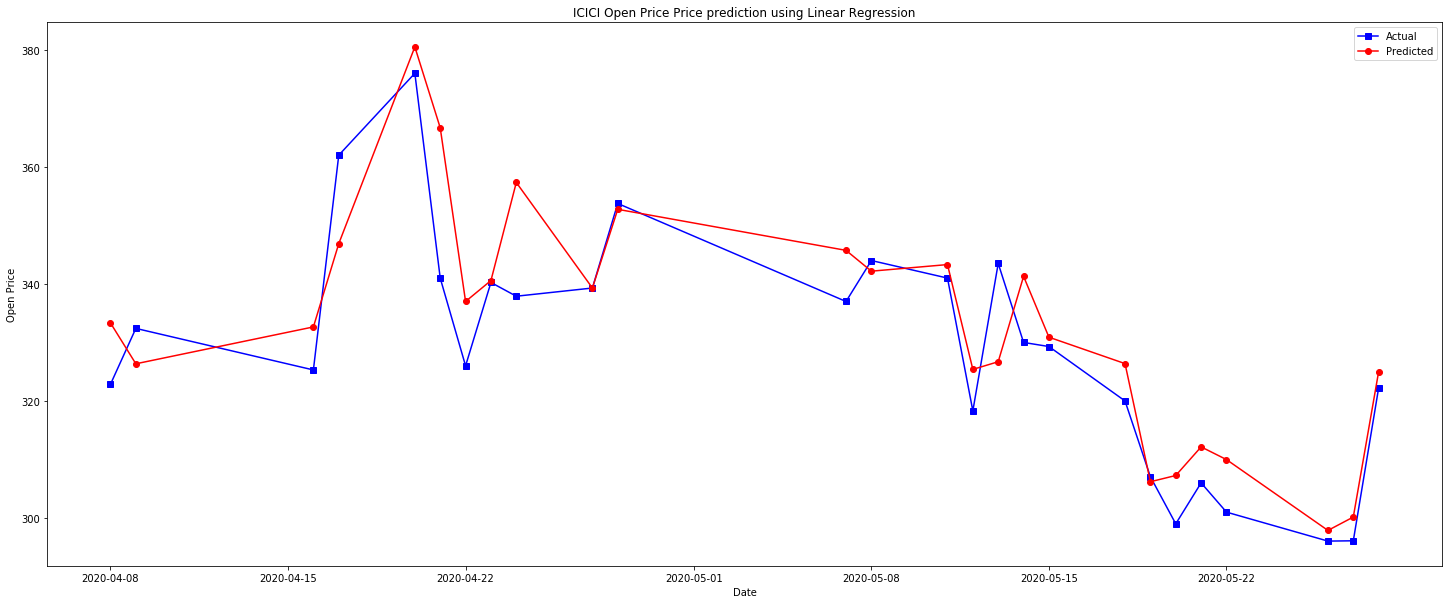

In [48]:
plt.figure(figsize = (25, 10))

plt.plot(test['Actual Open'], 'bs-', label = 'Actual')
plt.plot(test['LR Predicted Open'], 'ro-', label = 'Predicted')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Open Price")

plt.title('ICICI Open Price Price prediction using Linear Regression')
plt.show()

In [50]:
from joblib import dump, load
dump(model_linear, 'icici_lr.joblib')

['icici_lr.joblib']